# Problem Statement
Perform sentimental analysis on the Elon-musk tweets

In [1]:
import pandas as pd
import nltk
from nltk import tokenize
from nltk.corpus import stopwords
import string
import spacy
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tweet_data = pd.read_csv("C:\\Users\\ubed shaikh\\OneDrive\\Desktop\\Data Science\\Elon_musk.csv",encoding="latin-1")
tweet_data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
# remove both the leading and trailing characters
tweet_data= [Text.strip() for Text in tweet_data.Text]
# remove a empty string
tweet_data= [x for x in tweet_data if x]
tweet_data[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [4]:
tweet_data= ' '.join(tweet_data)
tweet_data

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [5]:
# Tokenizing based on sentences (wherever fullstop considers new sentence)
sentences= tokenize.sent_tokenize("".join(tweet_data))
sentences[0:10]

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [6]:
# convert tokenize sentences in to dataframe
sent_df= pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
922,"@kenyanwalstreet Not actually a payout, just a..."
923,"It may never pay out, as the stock cant b ht..."
924,Details Aug 28.
925,AI symbiosis while u wait @vistacruiser7 @flcn...


In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\ubed
[nltk_data]     shaikh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
stop_word= stopwords.words('english')
stop_word

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [9]:
sent_df['no_stop_word']= sent_df['sentence'].apply(lambda x: ' '.join([x for x in x.split() if x not in(stop_word)]))
sent_df

,sentence,no_stop_word
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,@kunalb11 Im alien @ID_AA_Carmack Ray tracing...
1,Have you tried it?,Have tried it?
2,@joerogan @Spotify Great interview!,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...,@gtera27 Doge underestimated @teslacn Congratu...
4,Now on to the next for even more!!,Now next even more!!
...,...,...
922,"@kenyanwalstreet Not actually a payout, just a...","@kenyanwalstreet Not actually payout, vesting ..."
923,"It may never pay out, as the stock cant b ht...","It may never pay out, stock cant b https://t...."
924,Details Aug 28.,Details Aug 28.
925,AI symbiosis while u wait @vistacruiser7 @flcn...,AI symbiosis u wait @vistacruiser7 @flcnhvy Th...


In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\ubed
[nltk_data]     shaikh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
sent_df['clean']= sent_df['no_stop_word'].apply(lambda x: ' '.join([x for x in x.split() if x not in string.punctuation]))
sent_df

,sentence,no_stop_word,clean
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,@kunalb11 Im alien @ID_AA_Carmack Ray tracing...,@kunalb11 Im alien @ID_AA_Carmack Ray tracing...
1,Have you tried it?,Have tried it?,Have tried it?
2,@joerogan @Spotify Great interview!,@joerogan @Spotify Great interview!,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...,@gtera27 Doge underestimated @teslacn Congratu...,@gtera27 Doge underestimated @teslacn Congratu...
4,Now on to the next for even more!!,Now next even more!!,Now next even more!!
...,...,...,...
922,"@kenyanwalstreet Not actually a payout, just a...","@kenyanwalstreet Not actually payout, vesting ...","@kenyanwalstreet Not actually payout, vesting ..."
923,"It may never pay out, as the stock cant b ht...","It may never pay out, stock cant b https://t....","It may never pay out, stock cant b https://t...."
924,Details Aug 28.,Details Aug 28.,Details Aug 28.
925,AI symbiosis while u wait @vistacruiser7 @flcn...,AI symbiosis u wait @vistacruiser7 @flcnhvy Th...,AI symbiosis u wait @vistacruiser7 @flcnhvy Th...


In [12]:
sent_df= sent_df.drop(labels= ['sentence','no_stop_word'],axis= 1)
sent_df

,clean
0,@kunalb11 Im alien @ID_AA_Carmack Ray tracing...
1,Have tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge underestimated @teslacn Congratu...
4,Now next even more!!
...,...
922,"@kenyanwalstreet Not actually payout, vesting ..."
923,"It may never pay out, stock cant b https://t...."
924,Details Aug 28.
925,AI symbiosis u wait @vistacruiser7 @flcnhvy Th...


In [14]:
affin= pd.read_csv("C:\\Users\\ubed shaikh\\Downloads\\afinn.csv")
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [15]:
affin.shape

(2477, 2)

In [16]:
affin_data= affin.set_index('word')['value'].to_dict()
affin_data

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [17]:
# calculate the score for each sentence
nlp= spacy.load('en_core_web_sm')
sentiment_lexicon= affin_data

def calculate_sentiment(text: str = None):
    sent_score= 0
    if text:
        sentence= nlp(text)
        for word in sentence:
            sent_score+= sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [18]:
sent_df['sentiment_value']= sent_df['clean'].apply(calculate_sentiment)
sent_df

,clean,sentiment_value
0,@kunalb11 Im alien @ID_AA_Carmack Ray tracing...,0
1,Have tried it?,0
2,@joerogan @Spotify Great interview!,3
3,@gtera27 Doge underestimated @teslacn Congratu...,3
4,Now next even more!!,0
...,...,...
922,"@kenyanwalstreet Not actually payout, vesting ...",0
923,"It may never pay out, stock cant b https://t....",-4
924,Details Aug 28.,0
925,AI symbiosis u wait @vistacruiser7 @flcnhvy Th...,-2


In [19]:
sent_df['word_count']= sent_df['clean'].str.split().apply(len)
sent_df

,clean,sentiment_value,word_count
0,@kunalb11 Im alien @ID_AA_Carmack Ray tracing...,0,9
1,Have tried it?,0,3
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge underestimated @teslacn Congratu...,3,11
4,Now next even more!!,0,4
...,...,...,...
922,"@kenyanwalstreet Not actually payout, vesting ...",0,7
923,"It may never pay out, stock cant b https://t....",-4,21
924,Details Aug 28.,0,3
925,AI symbiosis u wait @vistacruiser7 @flcnhvy Th...,-2,29


In [20]:
sent_df.sort_values(by= 'sentiment_value').head(10)

,clean,sentiment_value,word_count
650,Very ba https://t.co/tJsh1Exz1Q @justpaulinelo...,-8,41
64,"Also, road hell mostly paved bad intentions.",-7,7
840,Cool Model 3 review @iamjamiefoxx https://t.co...,-5,45
923,"It may never pay out, stock cant b https://t....",-4,21
614,"Then static fire, checkouts, static fire, fly ...",-4,11
683,"Occasional flights land ok, frequent (daily) f...",-4,26
285,Production/testing rocket engines 90% https://...,-3,16
747,@TimFernholz So madness acceptable Boeing/Lock...,-3,6
414,Also Dead Space 2.,-3,4
438,@SpaceX Just small-seeming issue loss upper st...,-3,8


In [21]:
sent_df.describe()

,sentiment_value,word_count
count,927.000000,927.000000
mean,1.421791,17.143474
std,2.717848,18.285943
min,-8.000000,0.000000
25%,0.000000,5.000000
50%,0.000000,10.000000
75%,3.000000,23.000000
max,18.000000,171.000000


In [22]:
sent_df[sent_df['sentiment_value']<0]

,clean,sentiment_value,word_count
6,"https://t.co/9WFKMYu2oj Frodo underdoge, All t...",-2,9
11,"However, https://t.co/9Z8Ac6skqx @RationalEtie...",-2,26
16,Thats youre missing.,-2,3
23,https://t.co/UEEocOfcTb The people spoken http...,-1,30
53,@WholeMarsBlog No stalks.,-1,3
...,...,...,...
889,This primarily electrical/electronic (chip des...,-2,60
890,Will write algorithms ever realize negativity ...,-3,7
897,No expert installer required.,-1,4
923,"It may never pay out, stock cant b https://t....",-4,21


In [23]:
sent_df[sent_df['sentiment_value']>= 10]

,clean,sentiment_value,word_count
36,"@ajtourville @Erdayastronaut @SpaceX Yes, engi...",18,171
81,@teslaownersSV This good one @MrBeastYT I whis...,13,30
102,@BoredElonMusk <U+0001F923><U+0001F923> @erigg...,11,25
105,@Erdayastronaut @SpaceX Was also thinking Spac...,16,66
153,"@GUNMTLM3 @lexfridman No, definitely year @lex...",10,33
161,@harsimranbansal @heydave7 It likely make sens...,11,68
185,Theres great AI ther https://t.co/v8mUhEApOQ ...,10,36
186,"Also, w https://t.co/IYdKttVsqk @cleantechnica...",12,68
226,"@PPathole @karpathy For second there, I though...",11,50
492,Gives false sense https://t.co/aIGaEnC8f0 @Pic...,10,31


In [24]:
sent_df[sent_df['sentiment_value']>20]

,clean,sentiment_value,word_count


In [25]:
sent_df['index']= range(0,len(sent_df))
sent_df

,clean,sentiment_value,word_count,index
0,@kunalb11 Im alien @ID_AA_Carmack Ray tracing...,0,9,0
1,Have tried it?,0,3,1
2,@joerogan @Spotify Great interview!,3,4,2
3,@gtera27 Doge underestimated @teslacn Congratu...,3,11,3
4,Now next even more!!,0,4,4
...,...,...,...,...
922,"@kenyanwalstreet Not actually payout, vesting ...",0,7,922
923,"It may never pay out, stock cant b https://t....",-4,21,923
924,Details Aug 28.,0,3,924
925,AI symbiosis u wait @vistacruiser7 @flcnhvy Th...,-2,29,925


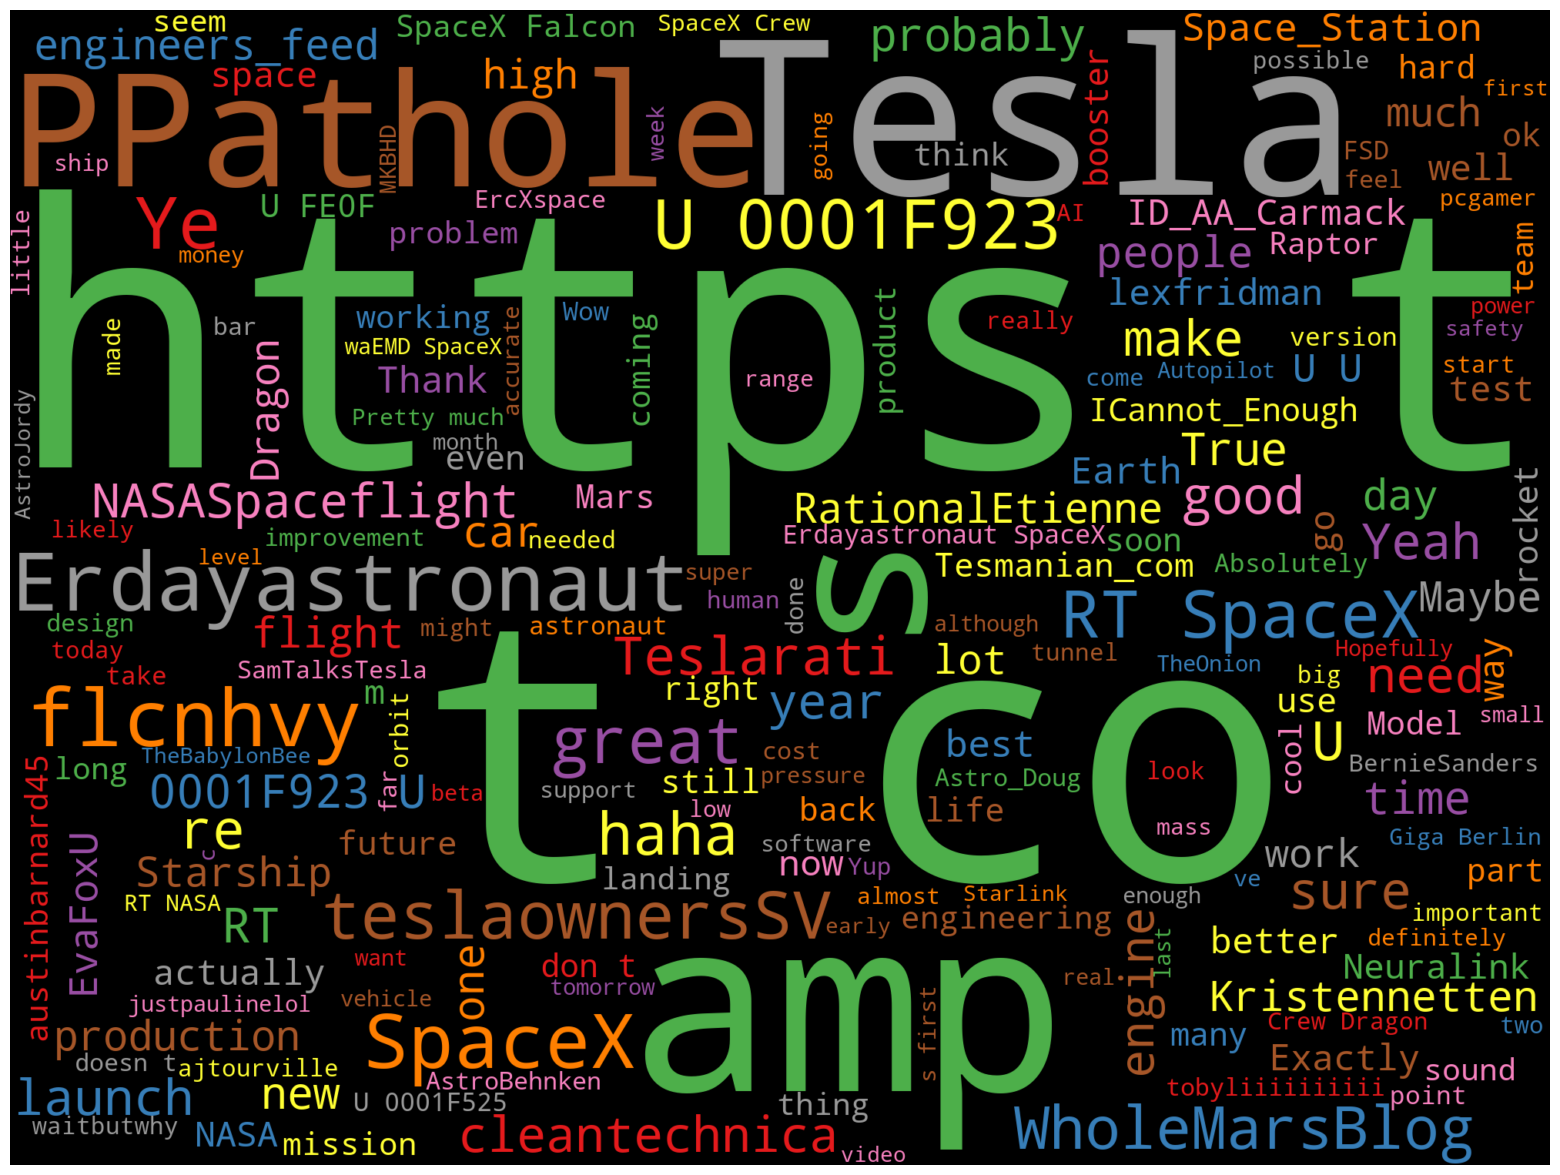

In [26]:
stopwords= STOPWORDS
stopwords.add('will')
wordcloud= WordCloud(width= 2000, height= 1500,background_color= 'black',colormap= 'Set1',stopwords=stopwords).generate(tweet_data)
plt.figure(figsize=(20,15))
plt.imshow(wordcloud,interpolation= "bilinear")
plt.axis('off');

In [27]:
wordcloud.to_file('wordclowd.png')

C:\Users\ubed shaikh\AppData\Local\Temp\ipykernel_4388\3533490662.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_value'])


<Axes: xlabel='sentiment_value', ylabel='Density'>

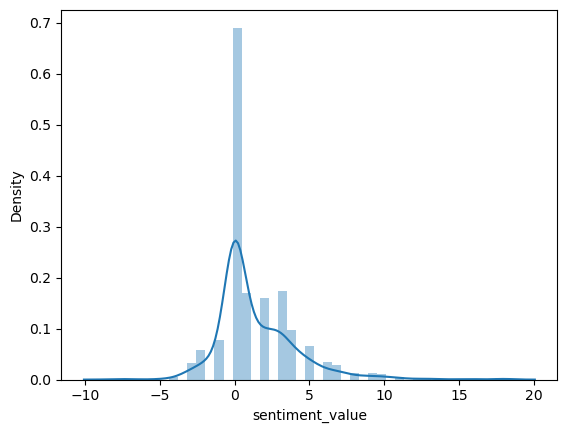

In [28]:
sns.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

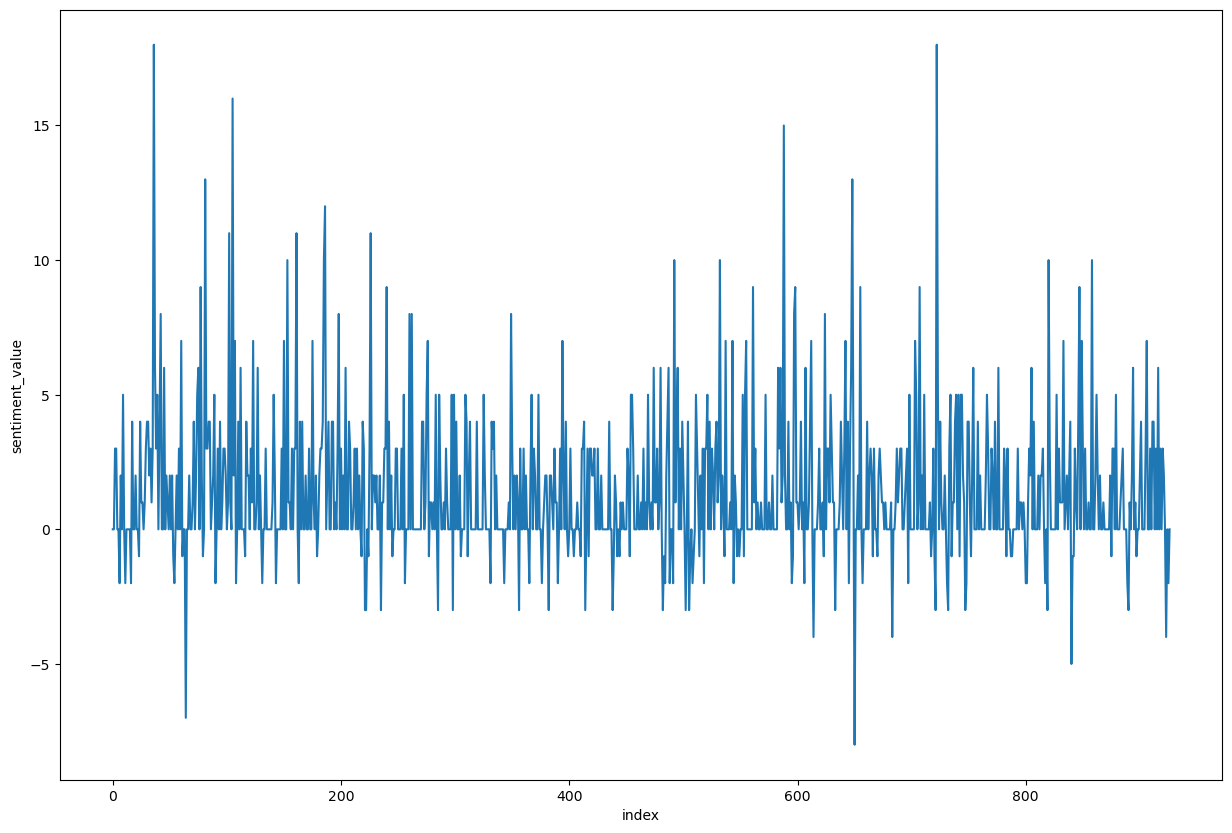

In [29]:
plt.figure(figsize= (15,10))
sns.lineplot(y= 'sentiment_value',x= 'index',data= sent_df)

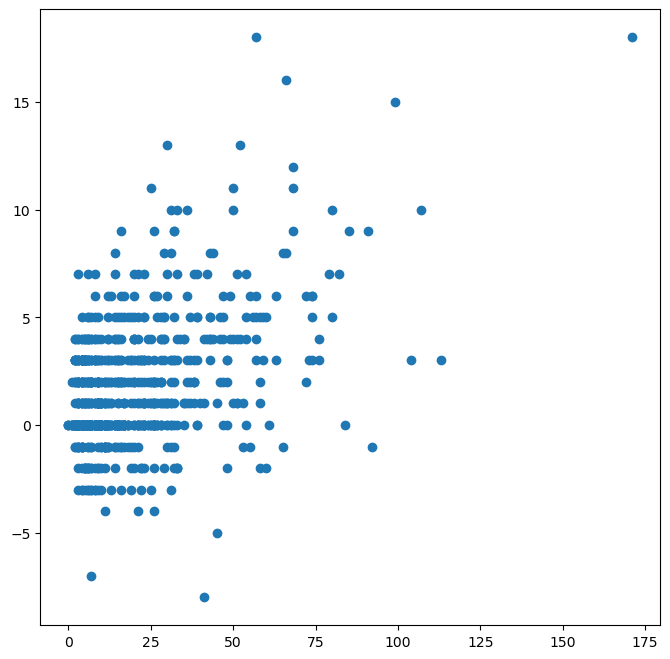

In [30]:
plt.figure(figsize= (8,8))
plt.scatter(x= 'word_count',y= 'sentiment_value',data= sent_df)

 According to sentiment value, Number of Positive tweets is greater than the number of Negative tweets